In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
#Para windows
pytesseract.pytesseract.tesseract_cmd = r"C:\Program files\Tesseract-OCR\tesseract.exe"

In [2]:
placa = []
image = cv2.imread("auto.jpg")
#Se traslada a escala de grises para poder diferenciar mejor los colores
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

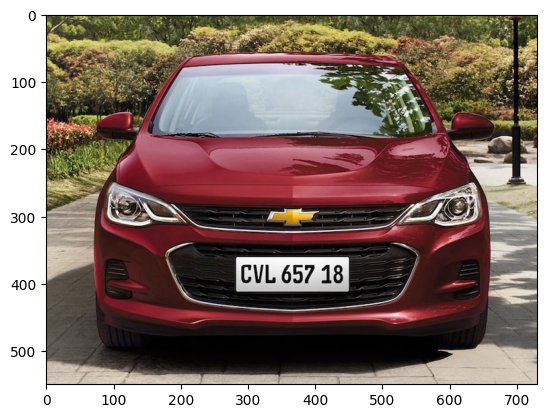

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

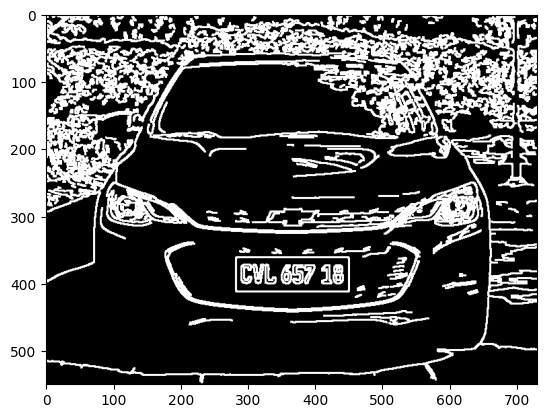

In [4]:
gray = cv2.blur(gray, (3,3))
canny = cv2.Canny(gray, 130, 200)
canny = cv2.dilate(canny, None, iterations = 1)
plt.imshow(canny, cmap="gray")

In [5]:
#Detección de contornos
contorno, _ = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
for c in contorno:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    epsilon = 0.09*cv2.arcLength(c, True)
    aprox = cv2.approxPolyDP(c, epsilon, True)
    #4 bordes y un area de 5000 pixeles
    if len(aprox)==4 and area > 9000:
        print("area", area)
        print("x", x)
        print("y", y)
        print("w", w)
        print("h", h)
        relAspec = float(w)/h
        print("Relación de aspecto: ", relAspec)
        #Pintar el contorno sobre la imagen original
        cv2.drawContours(image, [aprox],0,(0,255,0), 3)
        if relAspec > 3:
            placa = gray[y:y+h, x:x+w]
            text = pytesseract.image_to_string(placa, config = "--psm 11".strip())
            print("Placa:", text)
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0),3)
            cv2.putText(image, text, (x-20, y-10), 1, 2.2, (0,255,0),3)
            

area 9007.0
x 281
y 360
w 171
h 54
Relación de aspecto:  3.1666666666666665
Placa: CVL 657 18



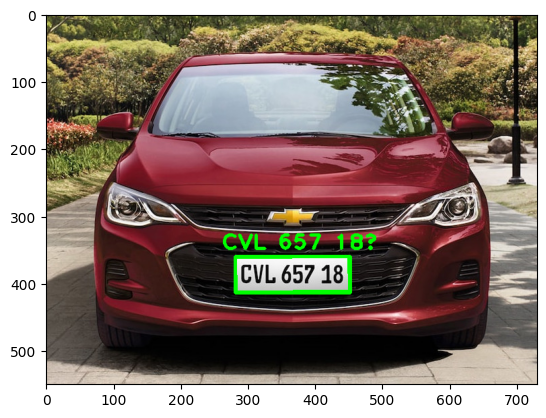

In [10]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));